# **Assignment 2 Q1, Q2** 
Group 18

Zheyu Liu 260784914; 

Sandra Deng 260770487





## **Readme**

In this assignment, we distributed the work evenly in our group. Zheyu is responsible for Q1 and Q2, and Sandra is responsible for Q3 and Q4.

## **Setup and importing**

In [5]:
!pip install opencv-contrib-python==3.4.2.16

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/ECSE415_Assignment/a2_images/'
face_image = '69996.png'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Question 1: Harris Corner**

### **1.0 Harris corner from scratch**

The non-max suppression is referenced from the non-msx suppression from the Tutorial 3.



In [7]:
def non_max_suppression(img_mag, img_phs):
    
    M, N = img_mag.shape
    Z = np.zeros((M,N), dtype=np.int32)
    
    # convert img_phs (radian) into angle image
    img_angle = img_phs * 180. / np.pi
    img_angle[img_angle < 0] += 180

    
    for i in range(1,M-1): # Note that we are leaving 1 pixel gap on each side of image
        for j in range(1,N-1): # as for boundary pixels one of its neighbourhood pixel is not defined
            
            # store neighbourhood pixels in variables q and r
            q = 255
            r = 255

            #angle 0
            if (0 <= img_angle[i,j] < 22.5) or (157.5 <= img_angle[i,j] <= 180):
                q = img_mag[i, j+1]
                r = img_mag[i, j-1]
            #angle 45
            elif (22.5 <= img_angle[i,j] < 67.5):
                q = img_mag[i+1, j-1]
                r = img_mag[i-1, j+1]
            #angle 90
            elif (67.5 <= img_angle[i,j] < 112.5):
                q = img_mag[i+1, j]
                r = img_mag[i-1, j]
            #angle 135
            elif (112.5 <= img_angle[i,j] < 157.5):
                q = img_mag[i-1, j-1]
                r = img_mag[i+1, j+1]

            # if pixel magnitude is higher than both its neighbour than keep     
            if (img_mag[i,j] >= q) and (img_mag[i,j] >= r):
                Z[i,j] = img_mag[i,j]
            # otherwise make its value to 0
            else:
                Z[i,j] = 0
    
    return Z

def thres_1(gray, thres):
  w = gray.shape[0]#width of the image
  h = gray.shape[1]#height of the image
  result = np.zeros_like(gray)
  max = 0
  for i in np.arange(h):#use two loops to thresholding each pixel
    for j in np.arange(w):
      if gray[j][i] > max:
        max = gray[j][i]

  for i in np.arange(h):#use two loops to thresholding each pixel
    for j in np.arange(w):
      if gray[j][i] > thres:
        result[j][i] = 255
      else:
        result[j][i] = 0
  title = "threshold = " + str(thres)
  return result, title

def harris_corner(img, size):
  #compute the image derivatives
  Ix = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=size)
  Iy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=size)
  #Square of derivatives
  Ix2 = Ix * Ix
  Iy2 = Iy * Iy
  IxIy = Ix * Iy
  #Apply Gaussian filter
  gIx2 = cv2.GaussianBlur(Ix2, (size, size), 1)
  gIy2 = cv2.GaussianBlur(Iy2, (size, size), 1)
  gIxIy = cv2.GaussianBlur(IxIy, (size, size), 1)
  #Cornerness function
  det = gIx2*gIy2 - gIxIy*gIxIy
  tra = (gIx2+gIy2)*(gIx2+gIy2)
  har = det - 0.05*tra
  #Perform non-maxima suppression
  hIx = cv2.Sobel(har,cv2.CV_64F,1,0,ksize=size)
  hIy = cv2.Sobel(har,cv2.CV_64F,0,1,ksize=size)
  img_phs = cv2.phase(hIx, hIy)
  Z = non_max_suppression(har, img_phs)
  return Z




### **1.1 Checkerboard**



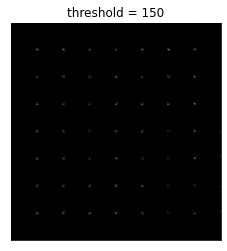

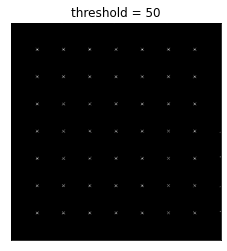

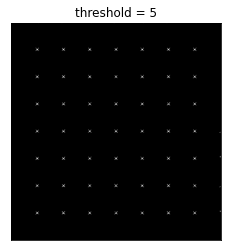

In [8]:
#Read image
img = mpimg.imread(path+'checkerboard.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Call Harris corner detection
Z = harris_corner(img, 7)
#Change different thresholds and show the output image
res1, tit1 = thres_1(Z.astype(np.uint8), 150)
plt.imshow(res1, cmap="gray")
plt.title(tit1)
plt.xticks([])
plt.yticks([])
plt.show()

res2, tit2 = thres_1(Z.astype(np.uint8), 50)
plt.imshow(res2, cmap="gray")
plt.title(tit2)
plt.xticks([])
plt.yticks([])
plt.show()

res3, tit3 = thres_1(Z.astype(np.uint8), 5)
plt.imshow(res3, cmap="gray")
plt.title(tit3)
plt.xticks([])
plt.yticks([])
plt.show()

I first set the threshold as a random value of 150, and I found that the harris corner is barely observable. In consequence, I decreased the threshold to 50, and I found that the detected harris corners are more clear and larger compared with the initial threshold because more pixels around the detected corner are set to white. I then continue decrease the threshold to 5, and the harris corners of the output become more clear compared the previous two outputs. In general, the points of the three outputs all lie on the intersection of the grid lines, the main difference is the size of these points. 

### **1.2 Shapes**

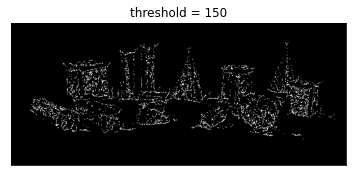

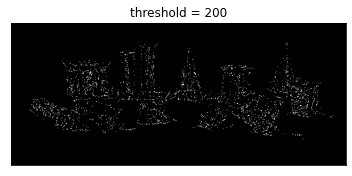

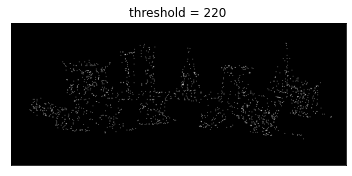

In [9]:
img = mpimg.imread(path+'shapes.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Call Harris corner detection
Z = harris_corner(img, 7)
#Change different thresholds and show the output image
res3, tit3 = thres_1(Z.astype(np.uint8), 150)
plt.imshow(res3, cmap="gray")
plt.title(tit3)
plt.xticks([])
plt.yticks([])
plt.show()

res2, tit2 = thres_1(Z.astype(np.uint8), 200)
plt.imshow(res2, cmap="gray")
plt.title(tit2)
plt.xticks([])
plt.yticks([])
plt.show()

res1, tit1 = thres_1(Z.astype(np.uint8), 220)
plt.imshow(res1, cmap="gray")
plt.title(tit1)
plt.xticks([])
plt.yticks([])
plt.show()


I tried three thresholds, 150, 200, 220 for the harris corner detection of the shapes image. We can find that when the threshold increase, the number of the points of the output of the Harris corner detection is smaller. When the threshold is 150, the number of points in the output of the harris corner detector is the largest. When the threshold is set to 220, the number of points in the output of the harris corner detector is the smallest.

### **1.3 Face**

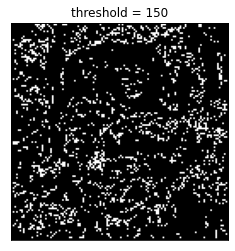

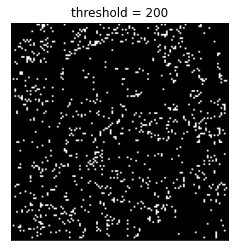

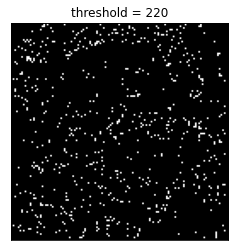

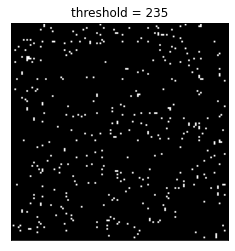

In [12]:
img = mpimg.imread(path+face_image)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#Call Harris corner detection
Z = harris_corner(img, 7)
#Change different thresholds and show the output image
res1, tit1 = thres_1(Z.astype(np.uint8), 150)
plt.imshow(res1, cmap="gray")
plt.title(tit1)
plt.xticks([])
plt.yticks([])
plt.show()

res2, tit2 = thres_1(Z.astype(np.uint8), 200)
plt.imshow(res2, cmap="gray")
plt.title(tit2)
plt.xticks([])
plt.yticks([])
plt.show()

res3, tit3 = thres_1(Z.astype(np.uint8), 220)
plt.imshow(res3, cmap="gray")
plt.title(tit3)
plt.xticks([])
plt.yticks([])
plt.show()

res4, tit4 = thres_1(Z.astype(np.uint8), 235)
plt.imshow(res4, cmap="gray")
plt.title(tit4)
plt.xticks([])
plt.yticks([])
plt.show()

I tried four thresholds, 150, 200, 220, 235 for the harris corner detection of the face image. We can find that when the threshold increase, the number of the points of the output of the Harris corner detection is smaller. When the threshold is 150, the number of points in the output of the harris corner detector is the largest. When the threshold is set to 235, the number of points in the output of the harris corner detector is the smallest.

## **Question 2: SIFT**

### **2.1**

#### **(1)**

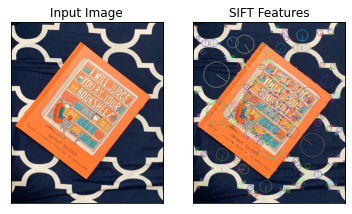

In [13]:
import cv2
img = mpimg.imread(path+'book.jpg')
img_disp = img.copy()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img, None)
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

#### **(2)**

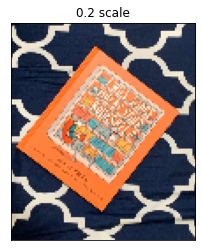

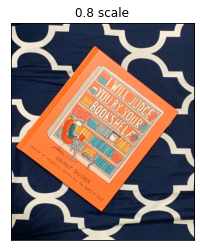

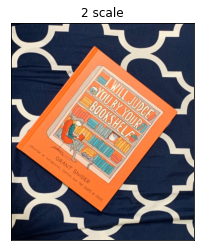

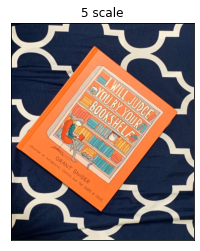

In [14]:
def scale_img(scale, img):
  
  h, w= img_disp.shape[0], img_disp.shape[1]
  dsize = (int(w * scale), int(h * scale))
  output = cv2.resize(img_disp, dsize)
  plt.imshow(output)
  plt.title(str(scale) + " scale")
  plt.xticks([])
  plt.yticks([])
  plt.show()
  return output

img = mpimg.imread(path+'book.jpg')
img_disp = img.copy()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
output1 = scale_img(0.2, img_disp)

img_disp = img.copy()
output2 = scale_img(0.8, img_disp)

img_disp = img.copy()
output3 = scale_img(2, img_disp)

img_disp = img.copy()
output4 = scale_img(5, img_disp)

#### **(3)**

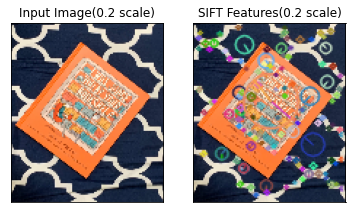

In [15]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(output1, None)
output1_disp = output1.copy()
cv2.drawKeypoints(output1, keypoints, output1_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(output1)
plt.title("Input Image(0.2 scale)"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(output1_disp)
plt.title("SIFT Features(0.2 scale)"), plt.xticks([]), plt.yticks([])
plt.show()

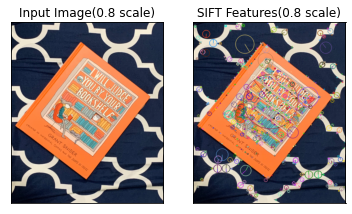

In [16]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(output2, None)
output2_disp = output2.copy()
cv2.drawKeypoints(output2, keypoints, output2_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(output2)
plt.title("Input Image(0.8 scale)"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(output2_disp)
plt.title("SIFT Features(0.8 scale)"), plt.xticks([]), plt.yticks([])
plt.show()

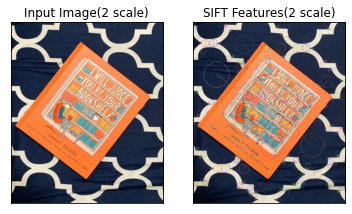

In [17]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(output3, None)
output3_disp = output3.copy()
cv2.drawKeypoints(output3, keypoints, output3_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(output3)
plt.title("Input Image(2 scale)"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(output3_disp)
plt.title("SIFT Features(2 scale)"), plt.xticks([]), plt.yticks([])
plt.show()

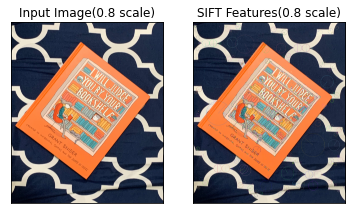

In [18]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(output4, None)
output4_disp = output4.copy()
cv2.drawKeypoints(output4, keypoints, output4_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(output4)
plt.title("Input Image(0.8 scale)"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(output4_disp)
plt.title("SIFT Features(0.8 scale)"), plt.xticks([]), plt.yticks([])
plt.show()

#### **(4)(5)(6)**

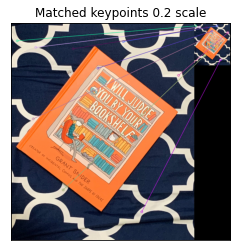

In [19]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(output1,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_1 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_1 = sorted(matches_1, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img,keypoints1,output1,keypoints2, matches_1[:10], None, flags=2)

plt.imshow(img3)
plt.title("Matched keypoints 0.2 scale"), plt.xticks([]), plt.yticks([])
plt.show()

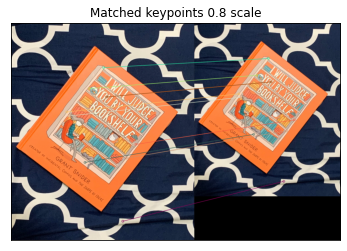

In [20]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(output2,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_2 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_2 = sorted(matches_2, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img,keypoints1,output2,keypoints2, matches_2[:10], None, flags=2)

plt.imshow(img3)
plt.title("Matched keypoints 0.8 scale"), plt.xticks([]), plt.yticks([])
plt.show()

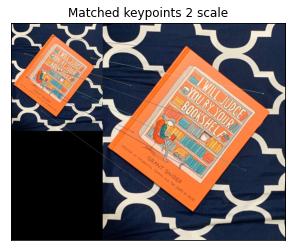

In [21]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(output3,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_3 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_3 = sorted(matches_3, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img,keypoints1,output3,keypoints2, matches_3[:10], None, flags=2)

plt.imshow(img3)
plt.title("Matched keypoints 2 scale"), plt.xticks([]), plt.yticks([])
plt.show()

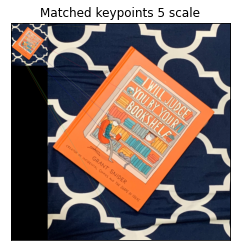

In [22]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(output4,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_4 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_4 = sorted(matches_4, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img,keypoints1,output4,keypoints2, matches_4[:10], None, flags=2)

plt.imshow(img3)
plt.title("Matched keypoints 5 scale"), plt.xticks([]), plt.yticks([])
plt.show()

#### **(7)**

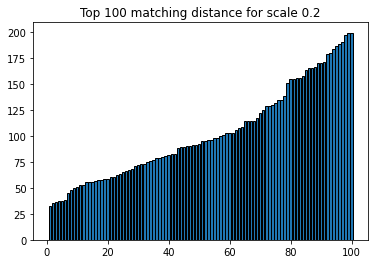

In [23]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_1[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for scale 0.2")
plt.show()

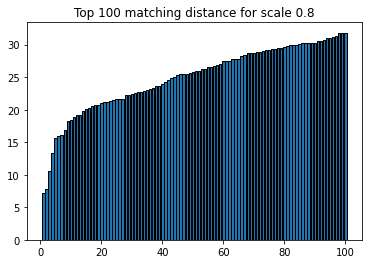

In [24]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_2[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for scale 0.8")
plt.show()

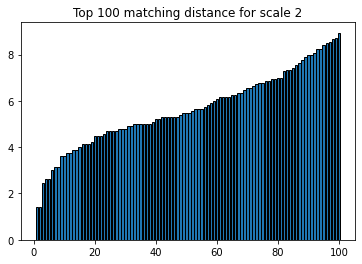

In [25]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_3[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for scale 2")
plt.show()

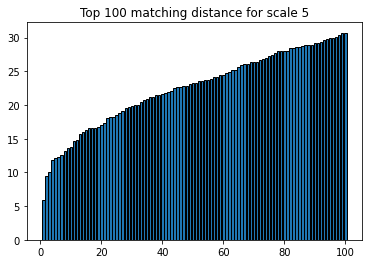

In [26]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_4[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for scale 5")
plt.show()

#### **(8)**
From the plot above, we can find that when the scale is 0.2, the matching distance is the largest. When we increase the scale of the image, the matching distance shows a decreasing trend and it is the smallest when the scale is 2. When the scale is 5, the matching distance increases but it is still smaller compared with the matching distance of scale 0.2. The cause of such observation s.t. when the scale is closer to the original image, the matching distance is closer is because the sift descriptor of the matching features will be more similar when the scale is closer to the original image. When the scale is too large or too small, there will also be more differences on the sift descriptor. In addition, when the scale is too small, the scaled image may loss some information and features.



### **2.2**

#### **(1)**

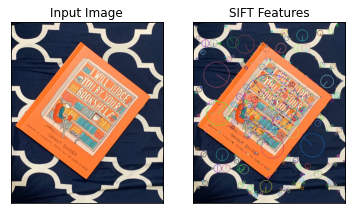

In [27]:
import cv2
img = mpimg.imread(path+'book.jpg')
img_disp = img.copy()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img, None)
cv2.drawKeypoints(img, keypoints, img_disp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("SIFT Features"), plt.xticks([]), plt.yticks([])
plt.show()

#### **(2)**

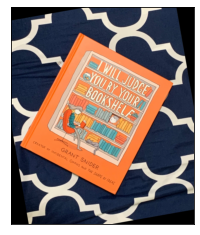

In [28]:
height, width = img.shape[0:2]
M = cv2.getRotationMatrix2D((width/2,height/2),10,1)
img2 = cv2.warpAffine(img,M,(width,height))
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.show()

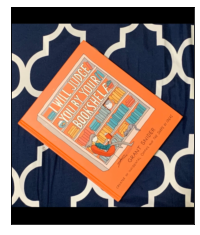

In [29]:
height, width = img.shape[0:2]
M = cv2.getRotationMatrix2D((width/2,height/2),90,1)
img3 = cv2.warpAffine(img,M,(width,height))
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.show()

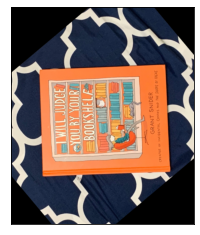

In [30]:
height, width = img.shape[0:2]
M = cv2.getRotationMatrix2D((width/2,height/2),130,1)
img4 = cv2.warpAffine(img,M,(width,height))
plt.imshow(img4)
plt.xticks([])
plt.yticks([])
plt.show()

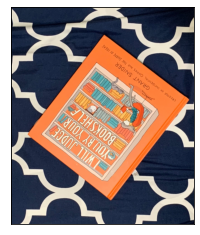

In [31]:
height, width = img.shape[0:2]
M = cv2.getRotationMatrix2D((width/2,height/2),180,1)
img5 = cv2.warpAffine(img,M,(width,height))
plt.imshow(img5)
plt.xticks([])
plt.yticks([])
plt.show()

#### **(3)**

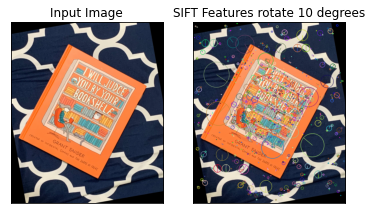

In [32]:
img_disp2 = img2.copy()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img, None)
cv2.drawKeypoints(img2, keypoints, img_disp2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(img2)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp2)
plt.title("SIFT Features rotate 10 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

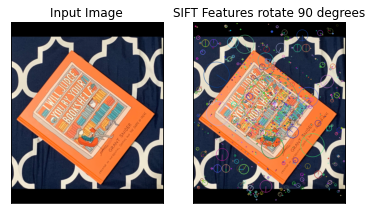

In [33]:
img_disp3 = img3.copy()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img, None)
cv2.drawKeypoints(img3, keypoints, img_disp3, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(img3)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp3)
plt.title("SIFT Features rotate 90 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

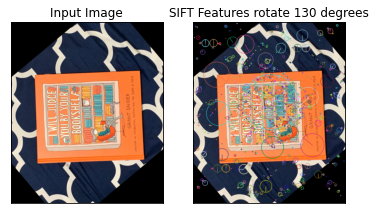

In [34]:
img_disp4 = img4.copy()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img, None)
cv2.drawKeypoints(img4, keypoints, img_disp4, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(img4)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp4)
plt.title("SIFT Features rotate 130 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

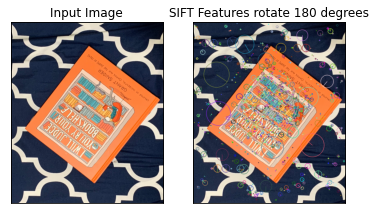

In [35]:
img_disp5 = img5.copy()
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img, None)
cv2.drawKeypoints(img5, keypoints, img_disp5, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(121), plt.imshow(img5)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp5)
plt.title("SIFT Features rotate 180 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

#### **(4)(5)(6)**

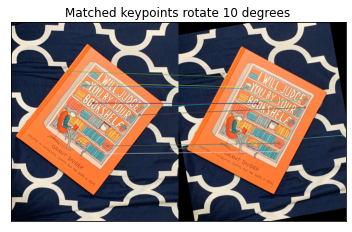

In [36]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_1 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_1 = sorted(matches_1, key = lambda x:x.distance)

# Draw first 10 matches.
r1 = cv2.drawMatches(img,keypoints1,img2,keypoints2, matches_1[:10], None, flags=2)

plt.imshow(r1)
plt.title("Matched keypoints rotate 10 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

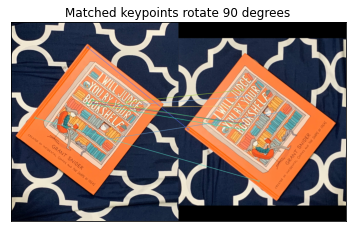

In [37]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(img3,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_2 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_2 = sorted(matches_2, key = lambda x:x.distance)

# Draw first 10 matches.
r2 = cv2.drawMatches(img,keypoints1,img3,keypoints2, matches_2[:10], None, flags=2)

plt.imshow(r2)
plt.title("Matched keypoints rotate 90 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

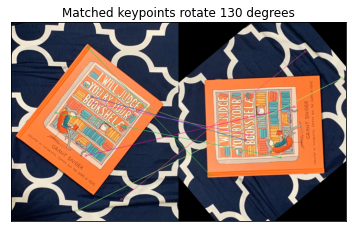

In [38]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(img4,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_3 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_3 = sorted(matches_3, key = lambda x:x.distance)

# Draw first 10 matches.
r3 = cv2.drawMatches(img,keypoints1,img4,keypoints2, matches_3[:10], None, flags=2)

plt.imshow(r3)
plt.title("Matched keypoints rotate 130 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

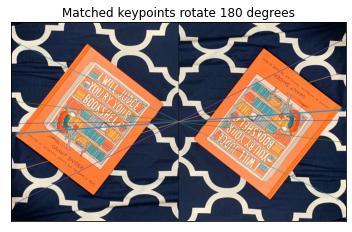

In [39]:
# Create a SIFT object
sift = cv2.xfeatures2d.SIFT_create()

# Compute the keypoints/descriptors
keypoints1,descriptors1 = sift.detectAndCompute(img,None)
keypoints2,descriptors2 = sift.detectAndCompute(img5,None)

bf = cv2.BFMatcher()#cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches_4 = bf.match(descriptors1,descriptors2) #query image, train image

# Sort them in the order of their distance.
matches_4 = sorted(matches_4, key = lambda x:x.distance)

# Draw first 10 matches.
r4 = cv2.drawMatches(img,keypoints1,img5,keypoints2, matches_4[:10], None, flags=2)

plt.imshow(r4)
plt.title("Matched keypoints rotate 180 degrees"), plt.xticks([]), plt.yticks([])
plt.show()

#### **(7)**

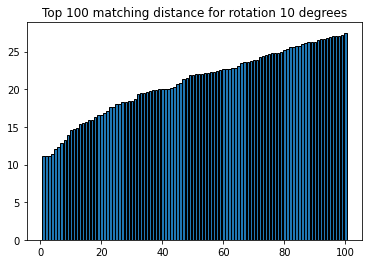

In [40]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_1[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for rotation 10 degrees")
plt.show()

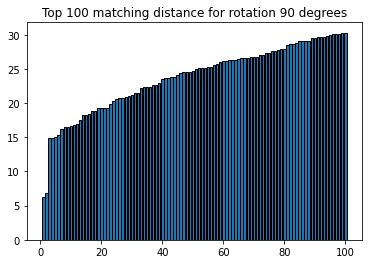

In [41]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_2[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for rotation 90 degrees")
plt.show()

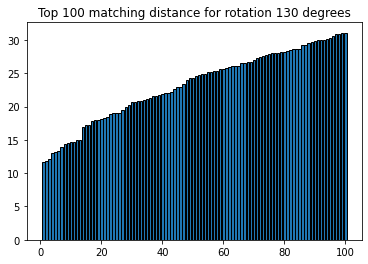

In [42]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_3[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for rotation 130 degrees")
plt.show()

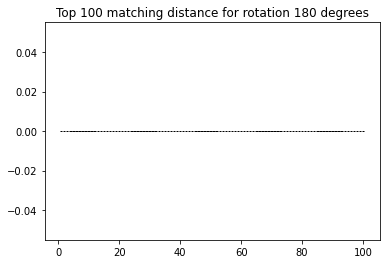

In [43]:
distances = np.zeros(100)
for i in range(100):
  distances[i] = matches_4[i].distance
plt.bar(np.arange(1,101),distances, edgecolor='k' )
plt.title("Top 100 matching distance for rotation 180 degrees")
plt.show()

#### **(8)**
In consequence, we can find that when we rotate the image for 10, 90, 130 degrees, the matching distance is similar. But when we rotate the image for 180 degrees, the matching distance is almost zero. The cause of such observation is when we rotate the image, some features are deleted in the output image when we rotate for 10, 90, and 130 degrees, and these features are complemented by black.  For the rotation of 180 degrees, we just flip the image, and all features are preserved. After changing the canoical orientation of the SIFT key to the same, the matching distance for the original image and the output image of 180 degrees will be exactly the same. That is why the matching distance of output image for the rotation of 180 degrees is 0 for top 100 features.